## Importamos y definimos el directorio y la version 

In [1]:
import numpy as np
import ast
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

directorio='G:\\Redes\\'
version=1

## Armamos la red dirigida a partir del archivo filtrado

In [2]:
N=100000
i=0
G=nx.DiGraph()
archivo = open(directorio+'archivo_red_'+str(version)+'.txt','r',encoding='utf-8')
for line in archivo:
    i+=1
    G.add_edges_from([(line.split()[0],line.split()[1])])
    if i==N:
        break
archivo.close()
len(G)

107896

## Graficamos la distribución de grado

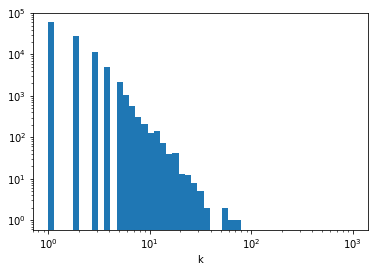

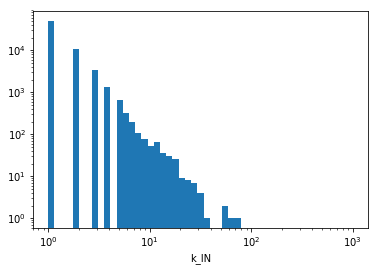

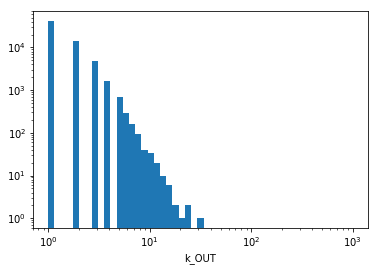

In [3]:
plt.figure()
grados_G = []
grados_G = [gra for n,gra in G.degree()]
Datos = np.asarray(grados_G)
b=np.logspace(0,3,50)
plt.hist(Datos, bins=b, log=True) 
plt.xscale('log')
plt.xlabel('k')
#plt.yscale('log')
plt.show()
plt.figure()
# Distribución de grado IN
grados_G = []
grados_G = [gra for n,gra in G.in_degree()] 
Datos = np.asarray(grados_G)
b=np.logspace(0,3,50)
plt.hist(Datos, bins=b, log=True) 
plt.xscale('log')
plt.xlabel('k_IN')
#plt.yscale('log')
plt.show()
plt.figure()
# Distribución de grado OUT
grados_G = []
grados_G = [gra for n,gra in G.out_degree()]
Datos = np.asarray(grados_G)
b=np.logspace(0,3,50)
plt.hist(Datos, bins=b, log=True) 
plt.xscale('log')
plt.xlabel('k_OUT')
#plt.yscale('log')
plt.show()

## Añadimos el año del paper como atributo a cada nodo

In [4]:
archivo = open(directorio+'archivo_year_'+str(version)+'.txt','r',encoding='utf-8')
i=0
for line in archivo:
    i+=1
    try:
        G.node[line.split()[0]]['year']=int(line.split()[1])
    except KeyError:
        pass
    if i==N:
        break
archivo.close()

## Añadimos el campo de estudio del paper como atributo, eligiendo el más frecuente

In [5]:
archivo = open(directorio+'archivo_fos_'+str(version)+'.txt','r',encoding='utf-8')
i=0
j=0
fos = {}
for line in archivo:
    i+=1
    a=line.split('[')[1].split(']')[0].split(', ')
    for tag in range(len(a)):
            try:
                b=fos[a[tag]]
                b+=1
                fos.update({a[tag]:b})
            except:
                fos[a[tag]]=1
    if i==N:
        break
archivo.close()

In [6]:
archivo = open(directorio+'archivo_fos_'+str(version)+'.txt','r',encoding='utf-8')
i=0
j=0
for line in archivo:
    i+=1
    a=line.split('[')[1].split(']')[0].split(', ')
    freq=np.zeros(len(a))
    try:
        for k in range(len(a)):
            freq[k]=fos[a[k]]
        key=a[np.argmax(freq)]    
        G.node[line.split()[0]]['campo']=key
        j+=1
    except KeyError:
        pass
    if i==N:
        break
archivo.close()

## Armamos una lista de redes de cada año

In [7]:
def red_year(G):
    G_year={}
    for i in range(1850,2019):
        lista_nodos=[]
        for node in G.nodes:
            try:
                KEY=G.nodes[node]['year']<i+1
                if KEY:
                    lista_nodos.append(node)
            except KeyError:
                pass
        G_year[str(i)]=G.subgraph(lista_nodos)
    return(G_year)

In [8]:
G_year=red_year(G)

## Calculamos el tamaño de la red total y la componenete gigante año a año

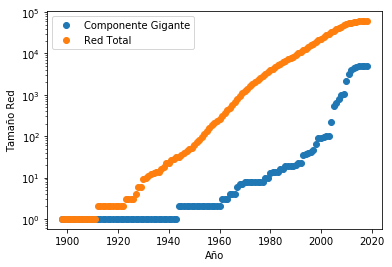

In [9]:
tamanos_gigante=[]
tamanos_red=[]
years=[]
campos=[]
for i in G_year.keys():
    campo=[]
    if len(G_year[i])>0:
        GG=G_year[i].to_undirected()
        Componente=sorted(nx.connected_components(GG), key=len, reverse=True)[0]
        Componente=GG.subgraph(Componente)
        for node in Componente.nodes:
            try:
                campo.append(G.nodes[node]['campo'])
            except KeyError:
                pass
        campos.append(Counter(campo))
        tamanos_gigante.append(len(Componente))
        tamanos_red.append(len(GG))
        years.append(int(i))

plt.semilogy(years,tamanos_gigante,'o',label='Componente Gigante')
plt.semilogy(years,tamanos_red,'o',label='Red Total')

plt.xlabel('Año');plt.ylabel('Tamaño Red');plt.legend()
plt.show()

## Calculamos la cantidad de campos total y en la componente gigante

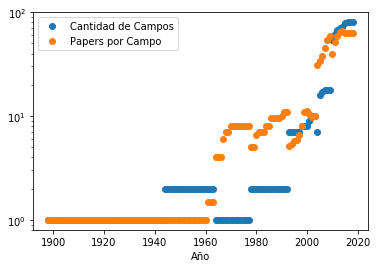

In [10]:
cantidad_de_campos=[]
for campo in campos:
    cantidad_de_campos.append(len(campo))
papers_por_campo=np.asarray(tamanos_gigante)/np.asarray(cantidad_de_campos)
plt.semilogy(years,cantidad_de_campos,'o',label='Cantidad de Campos')
plt.semilogy(years,papers_por_campo,'o',label='Papers por Campo')

plt.xlabel('Año');plt.ylabel('');plt.legend()
plt.show()

## Calculamos el tamaño de cada campo en la componente gigante

In [11]:
campos_tiempo={}
for cyear in campos:
    for campo in cyear.keys():
        campos_tiempo.update({campo:[]})

In [12]:
for campo in campos_tiempo:
    for cyear in campos:
        try:
            campos_tiempo[campo].append(cyear[campo])
        except KeyError:
            campos_tiempo[campo].append(0)

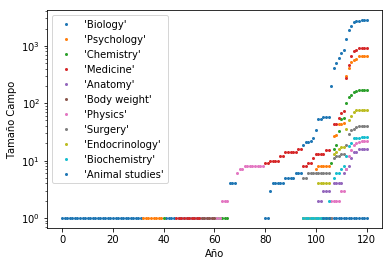

In [13]:
N=11
i=0
MS=2
for campo in campos_tiempo.keys():
    plt.semilogy(campos_tiempo[campo],'o',markersize=MS,label=campo)
    i+=1
    if i==N:
        break
plt.xlabel('Año');plt.ylabel('Tamaño Campo');plt.legend()
plt.show()

## Calculamos el tamaño de cada campo en las componentes 1 a 4

In [14]:
tamanos_gigante_1=[]
years_1=[]
campos_1=[]
tamanos_gigante_2=[]
years_2=[]
campos_2=[]
tamanos_gigante_3=[]
years_3=[]
campos_3=[]
tamanos_gigante_4=[]
years_4=[]
campos_4=[]
for i in G_year.keys():
    campo_1=[]
    if len(G_year[i])>1:
        GG=G_year[i].to_undirected()
        Componente=sorted(nx.connected_components(GG), key=len, reverse=True)[1]
        Componente=GG.subgraph(Componente)
        tamanos_gigante_1.append(len(Componente))
        years_1.append(int(i))
        for node in Componente.nodes:
            try:
                campo_1.append(G.nodes[node]['campo'])
            except KeyError:
                pass
        campos_1.append(Counter(campo_1))
    campo_2=[]
    if len(G_year[i])>2:
        GG=G_year[i].to_undirected()
        Componente=sorted(nx.connected_components(GG), key=len, reverse=True)[2]
        Componente=GG.subgraph(Componente)
        tamanos_gigante_2.append(len(Componente))
        years_2.append(int(i))
        for node in Componente.nodes:
            try:
                campo_2.append(G.nodes[node]['campo'])
            except KeyError:
                pass
        campos_2.append(Counter(campo_2))
    campo_3=[]
    if len(G_year[i])>3:
        GG=G_year[i].to_undirected()
        Componente=sorted(nx.connected_components(GG), key=len, reverse=True)[3]
        Componente=GG.subgraph(Componente)
        tamanos_gigante_3.append(len(Componente))
        years_3.append(int(i))
        for node in Componente.nodes:
            try:
                campo_3.append(G.nodes[node]['campo'])
            except KeyError:
                pass
        campos_3.append(Counter(campo_3))
    campo_4=[]
    if len(G_year[i])>4:
        GG=G_year[i].to_undirected()
        Componente=sorted(nx.connected_components(GG), key=len, reverse=True)[4]
        Componente=GG.subgraph(Componente)
        tamanos_gigante_4.append(len(Componente))
        years_4.append(int(i))
        for node in Componente.nodes:
            try:
                campo_4.append(G.nodes[node]['campo'])
            except KeyError:
                pass
        campos_4.append(Counter(campo_4))

In [15]:
def campos_dinamica(campos):
    campos_tiempo={}
    for cyear in campos:
        for campo in cyear.keys():
            campos_tiempo.update({campo:[]})
    for campo in campos_tiempo:
        for cyear in campos:
            try:
                campos_tiempo[campo].append(cyear[campo])
            except KeyError:
                campos_tiempo[campo].append(0)
    return(campos_tiempo)

In [16]:
campos_tiempo_1=campos_dinamica(campos_1)
campos_tiempo_2=campos_dinamica(campos_2)
campos_tiempo_3=campos_dinamica(campos_3)
campos_tiempo_4=campos_dinamica(campos_4)

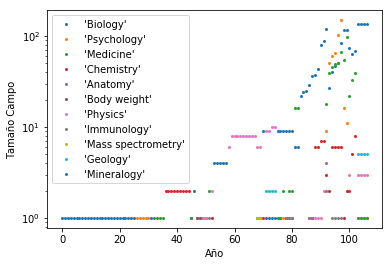

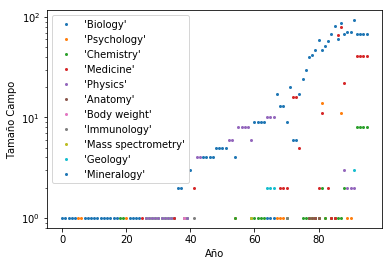

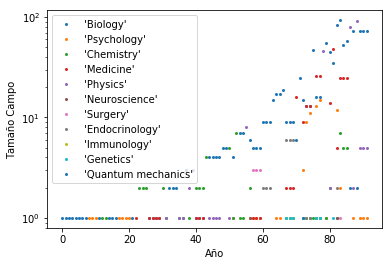

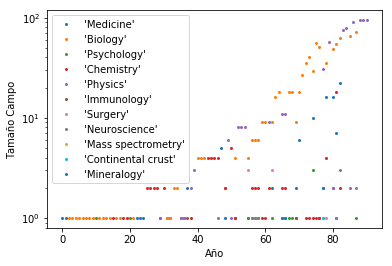

In [17]:
plt.figure()
N=11;i=0;MS=2
for campo in campos_tiempo_1.keys():
    plt.semilogy(campos_tiempo_1[campo],'o',markersize=MS,label=campo)
    i+=1
    if i==N:
        break
plt.xlabel('Año');plt.ylabel('Tamaño Campo');plt.legend()

plt.figure()
N=11;i=0;MS=2
for campo in campos_tiempo_2.keys():
    plt.semilogy(campos_tiempo_2[campo],'o',markersize=MS,label=campo)
    i+=1
    if i==N:
        break
plt.xlabel('Año');plt.ylabel('Tamaño Campo');plt.legend()

plt.figure()
N=11;i=0;MS=2
for campo in campos_tiempo_3.keys():
    plt.semilogy(campos_tiempo_3[campo],'o',markersize=MS,label=campo)
    i+=1
    if i==N:
        break
plt.xlabel('Año');plt.ylabel('Tamaño Campo');plt.legend()

plt.figure()
N=11;i=0;MS=2
for campo in campos_tiempo_4.keys():
    plt.semilogy(campos_tiempo_4[campo],'o',markersize=MS,label=campo)
    i+=1
    if i==N:
        break
plt.xlabel('Año');plt.ylabel('Tamaño Campo');plt.legend()

plt.show()

## Graficamos el tamaño total y de las componentes 0 a 4 en función del tiempo

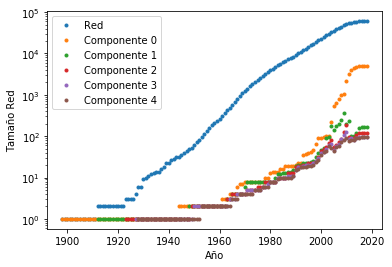

In [18]:
MS=3
plt.semilogy(years,tamanos_red,'o',markersize=MS,label='Red')       
plt.semilogy(years,tamanos_gigante,'o',markersize=MS,label='Componente 0')
plt.semilogy(years_1,tamanos_gigante_1,'o',markersize=MS,label='Componente 1')
plt.semilogy(years_2,tamanos_gigante_2,'o',markersize=MS,label='Componente 2')
plt.semilogy(years_3,tamanos_gigante_3,'o',markersize=MS,label='Componente 3')
plt.semilogy(years_4,tamanos_gigante_4,'o',markersize=MS,label='Componente 4')
plt.xlabel('Año');plt.ylabel('Tamaño Red');plt.legend()
plt.show()

## Graficamos el tamaño total y de todas las componentes

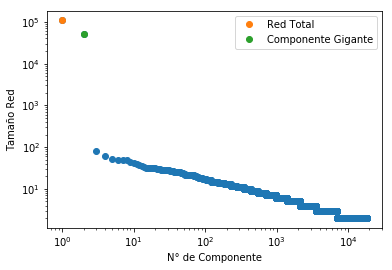

In [19]:
GG=G.copy()
GG=GG.to_undirected()
Componente_INT=sorted(nx.connected_components(GG), key=len, reverse=True)
Componentes=[]

for i in Componente_INT:
    Componentes.append(GG.subgraph(i))
largo=[len(GG)]
for i in Componentes:
    largo.append(len(i))

plt.loglog(range(1,len(largo)+1),largo,'o')
plt.loglog(1,largo[0],'o',label='Red Total')
plt.loglog(2,largo[1],'o',label='Componente Gigante')
plt.xlabel('N° de Componente');plt.ylabel('Tamaño Red');plt.legend()
plt.show()

## Graficamos el tamaño total y de todas las componentes

In [183]:
G.node['0000015a-5721-4f2a-ac3f-a67ccd9812e0']['campo']

"'Chemistry'"